In [6]:
import sys
sys.path.append('../script')
import compoundFromENDFtk
import ENDFtk
import numpy as np
import matplotlib.pyplot as plt

tapename = '/home/sole-pie01/work/ndlib/jeff4t3-neutron/45-rh-103g.jeff4t3'

compound_system = compoundFromENDFtk.create_compound_nucleus(tapename)

tape = ENDFtk.tree.Tape.from_file(tapename)
mat_number = tape.material_numbers[0]
mf2 = tape.MAT(mat_number).MF(2).MT(151).parse()
resonance_range = mf2.isotopes[0].resonance_ranges[0]
E_lab_values = np.linspace(resonance_range.EL, resonance_range.EH, 5000)  # Energies in MeV

2


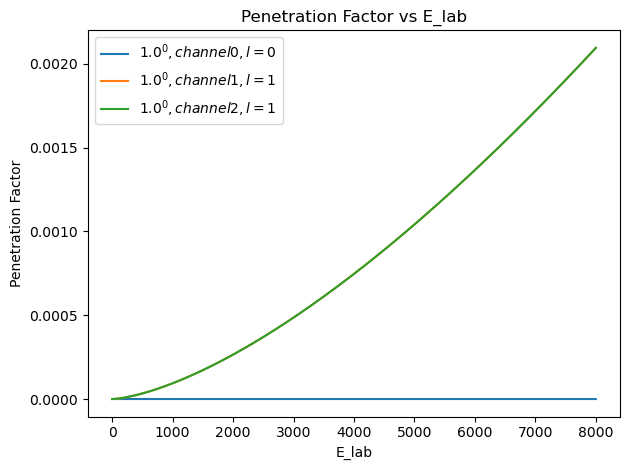

In [14]:
def plot_penetration(compound, erange, spin_group_number):
    penetration_factors = {}

    spin_group = compound.spinGroups()[spin_group_number]
    for E_lab in erange:
        for iCh, channel in enumerate(spin_group.channels()):
            l_val = channel.L()
            P = channel.PenetrationFactor(E_lab, l_val, compound.entranceParticlePair())
            label = f'${spin_group.getJ()}^{{{spin_group.getPJ()}}}, channel {iCh}, l = {l_val}$'
            penetration_factors.setdefault(label, []).append(P)

    # plt.figure(figsize=(10, 15))

    for label, P_values in penetration_factors.items():
        plt.plot(erange, P_values, label=label)
    plt.title('Penetration Factor vs E_lab')
    plt.xlabel('E_lab')
    plt.ylabel('Penetration Factor')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_penetration(compound_system, E_lab_values, spin_group_number = 3)  # Example usage with spin group 0


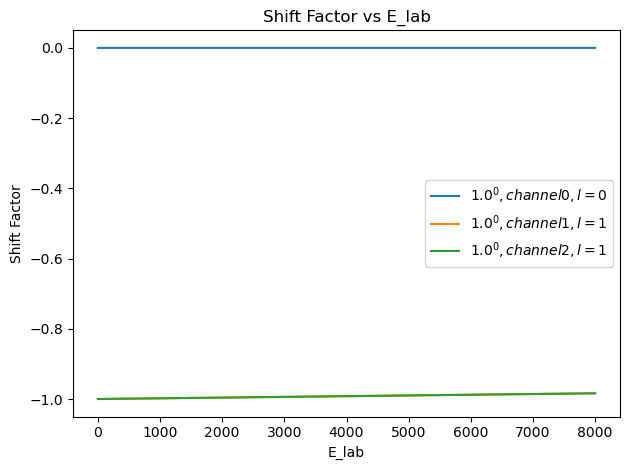

In [15]:
def plot_shift_factor(compound, erange, spin_group_number):
    shift_factors = {}

    spin_group = compound.spinGroups()[spin_group_number]
    for E_lab in erange:
        for iCh, channel in enumerate(spin_group.channels()):
            l_val = channel.L()
            S = channel.ShiftFactor(E_lab, l_val, compound.entranceParticlePair())
            label = f'${spin_group.getJ()}^{{{spin_group.getPJ()}}}, channel {iCh}, l = {l_val}$'
            shift_factors.setdefault(label, []).append(S)

    for label, S_values in shift_factors.items():
        plt.plot(erange, S_values, label=label)
    plt.title('Shift Factor vs E_lab')
    plt.xlabel('E_lab')
    plt.ylabel('Shift Factor')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_shift_factor(compound_system, E_lab_values, spin_group_number=3)  # Example usage with spin group 3

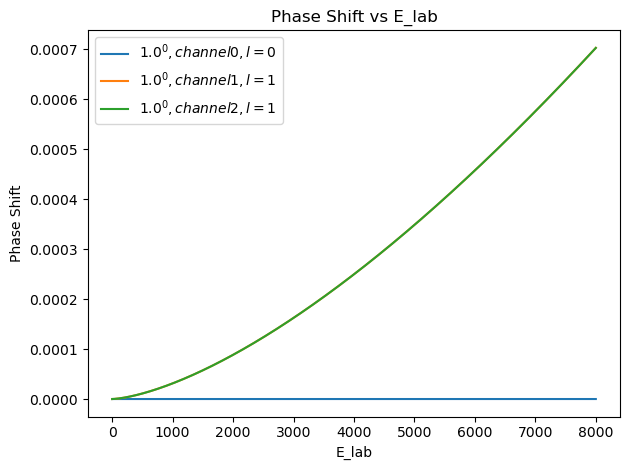

In [16]:
def plot_phase_shift(compound, erange, spin_group_number):
    phase_shifts = {}

    spin_group = compound.spinGroups()[spin_group_number]
    for E_lab in erange:
        for iCh, channel in enumerate(spin_group.channels()):
            l_val = channel.L()
            phase_shift = channel.PhaseShift(E_lab, l_val, compound.entranceParticlePair())
            label = f'${spin_group.getJ()}^{{{spin_group.getPJ()}}}, channel {iCh}, l = {l_val}$'
            phase_shifts.setdefault(label, []).append(phase_shift)

    for label, phase_shift_values in phase_shifts.items():
        plt.plot(erange, phase_shift_values, label=label)
    plt.title('Phase Shift vs E_lab')
    plt.xlabel('E_lab')
    plt.ylabel('Phase Shift')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_phase_shift(compound_system, E_lab_values, spin_group_number=3)  # Example usage with spin group 3